<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Differential-fluxes-and-differentially-expressed-genes" data-toc-modified-id="Differential-fluxes-and-differentially-expressed-genes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Differential fluxes and differentially expressed genes</a></span></li><li><span><a href="#Storage-of-TAG-and-carbohydrate" data-toc-modified-id="Storage-of-TAG-and-carbohydrate-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Storage of TAG and carbohydrate</a></span></li><li><span><a href="#Intersection-between-differential-model-predicted-fluxes-and-gene-expressions" data-toc-modified-id="Intersection-between-differential-model-predicted-fluxes-and-gene-expressions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Intersection between differential model-predicted fluxes and gene expressions</a></span></li></ul></div>

In [4]:
import pandas as pd
import numpy as np
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from jupyterthemes import jtplot
jtplot.style(theme='grade3', grid=False)
import scipy

# Differential fluxes and differentially expressed genes

In [5]:
df_up_down = pd.read_csv('compare_up_down_subs.csv', index_col=0)
df_up_down = df_up_down.sort_values(by= 'parameter', axis=0)
df_up_down.parameter =df_up_down.parameter.str.replace('N02NO3', 'NO2 + NO3')

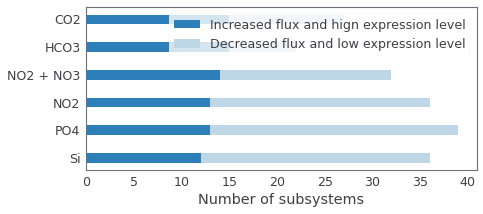

In [6]:
# plot
labels = list(df_up_down.parameter)
path_gene = list(df_up_down.n_consis)
path_gene1 = list(df_up_down.n_consis_up)
path_gene2 = list(df_up_down.n_consis_down)
path_nogene = list(df_up_down.n_inconsis)
width = 0.35       # the width of the bars: can also be len(x) sequence
fig, bax = plt.subplots(figsize=(7,3))
#bax.barh(labels, path_gene, width, label='Flux consistent with expression', color='#2c7fb8')
bax.barh(labels, path_gene1, width, label='Increased flux and hign expression level', color='#2c7fb8ff')
bax.barh(labels, path_gene2, width, left=path_gene1, 
         label='Decreased flux and low expression level', color='#bdd7e7ff')
#bax.barh(labels, path_nogene, width, left=np.array(path_gene1)+np.array(path_gene2),
       #label='Flux inconsistent with expression',color ='#c6dbef')
bax.set_yticks(np.arange(len(labels)))
bax.set_yticklabels(labels)
bax.invert_yaxis()
#bax.set_ylabel('Parameters')
bax.set_xlabel('Number of subsystems')
#bax.set_title('Scores by group and gender')
bax.legend(loc= 'best')
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('compare_up_down_number_subs_without_inconsis.svg')
plt.show()

# Storage of TAG and carbohydrate

In [7]:
df_tag = pd.read_csv('tag_storage.csv', index_col=0)

In [8]:
df_tag.columns = ['Low CO2','High CO2']

Text(0, 0.5, 'Flux (mmol/gDW•h)')

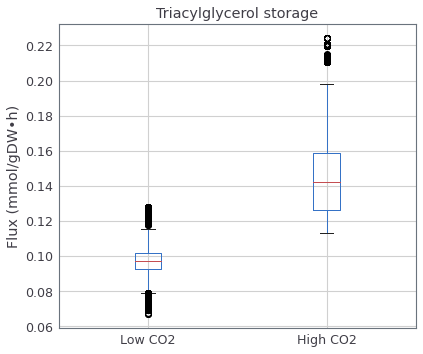

In [9]:
df_tag.boxplot(column=['Low CO2', 'High CO2'])
plt.title('Triacylglycerol storage')
plt.ylabel('Flux (mmol/gDW•h)')
#plt.savefig('storage_overflow_TAG_box_2.svg',format='SVG')

In [10]:
df_glucan = pd.read_csv('glucan_storage.csv', index_col=0)

In [11]:
df_glucan.columns = ['Low CO2','High CO2']

Text(0, 0.5, 'Flux (mmol/gDW•h)')

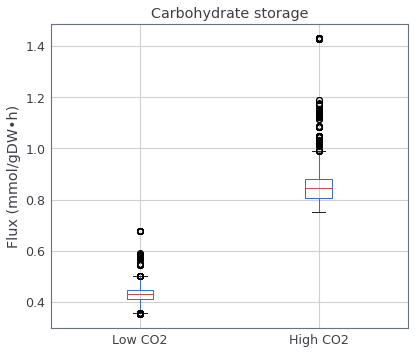

In [12]:
df_glucan.boxplot(column=['Low CO2','High CO2'])
plt.title('Carbohydrate storage')
plt.ylabel('Flux (mmol/gDW•h)')
#plt.savefig('storage_overflow_TAG_box_2.svg',format='SVG')

# Intersection between differential model-predicted fluxes and gene expressions

In [13]:
# plot number of reactions at subsystem-level (only consistent data)
def plot_n_up_down(parameter):
    df_up_down = pd.read_csv('compare_up_down_rxns_'+parameter+'_subs.csv', index_col=0)
    #filter the data based on up and down regulated subsystems
    df_up = pd.read_csv('flux_expr_consis_up_'+parameter+'.csv', index_col=0)
    df_up = df_up.reset_index(drop=True)
    df_down = pd.read_csv('flux_expr_consis_down_'+parameter+'.csv', index_col=0)
    df_down = df_down.reset_index(drop=True)

    temp =[]
    df_up_down['up_down']=''
    for i, sub in enumerate(list(df_up_down.subsystem)):
        if sub in list(df_up.subs):
            df_up_down.up_down.iloc[i] = 'up'

    for i, sub in enumerate(list(df_up_down.subsystem)):
        if sub in list(df_down.subs):
            df_up_down.up_down.iloc[i] = 'down'

    df_up_down = df_up_down[(df_up_down.up_down=="up")|(df_up_down.up_down=="down")].reset_index(drop=True)
    df_up_down = df_up_down.sort_values(by='n_all', ascending=False).reset_index(drop=True)
    color_index = df_up_down.up_down
    lut_row = {'up': '#2c7fb8ff',
     'down': '#bdd7e7ff'}
    colors = color_index.map(lut_row)
    labels = list(df_up_down.subsystem)
    path_gene = list(df_up_down.n_all)
    width = 0.35       
    fig, bax = plt.subplots(figsize=(7,12))
    bax.barh(labels, path_gene, width, color=colors)
    bax.set_yticks(np.arange(len(labels)))
    bax.set_yticklabels(labels)
    bax.invert_yaxis()
    #bax.set_ylabel('Subsystem')
    bax.set_xlabel('Number of reactions')
    #bax.set_title(parameter)
    bax.legend(loc= 'lower right')
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig('compare_up_down_number_'+parameter+'_filter_consis_subs.svg')
     
    plt.show()
    return df_up_down

/home/manish/anaconda2/envs/rstudio/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


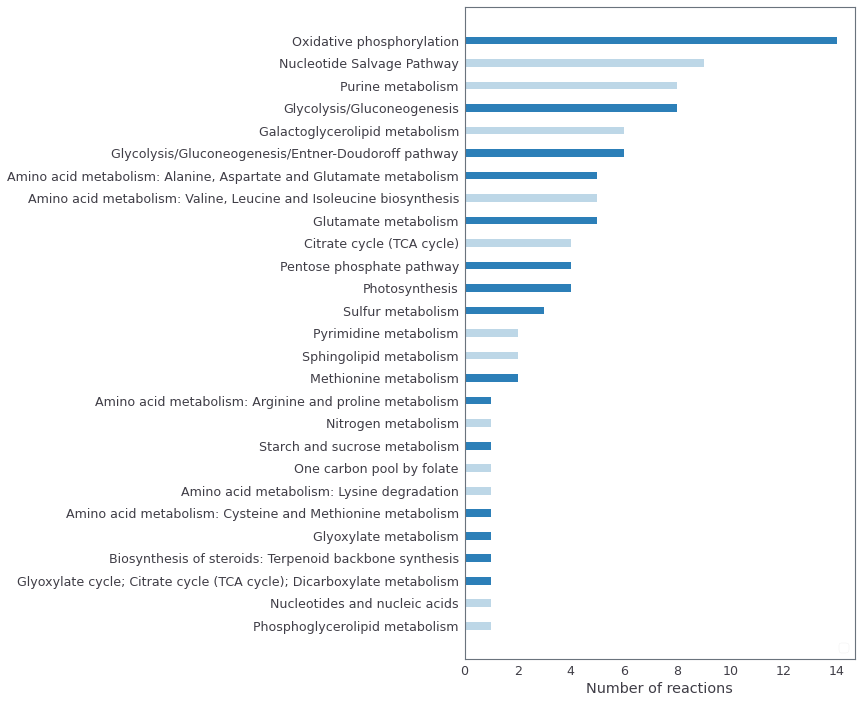

In [14]:
parameters = ['CO2']
for i, parameter in enumerate(parameters):
    df_up_down = plot_n_up_down(parameter=parameter)

In [15]:
df_up_down.to_csv('delete.csv')